# This is an alternate method with deep learning pre-trained model , which includes text detection and text recognition with pytprch and OCR

 It is a Deep Learning Pre traind Model with text detection and recognisation with pyTorch and OCR , which can be customized as per our use. I selected this because of the robust ML pipeline that is used first text detection (localizing words), then text recognition (identify all characters in the word), which gives the edge to extract information seamlessly.


In [ ]:
# TensorFlow
# !pip install python-doctr[tf]
# PyTorch
!pip install python-doctr[torch]

In [ ]:
!pip install -e git+https://github.com/mindee/doctr.git#egg=python-doctr[torch]

 Go to  `Runtime/Restart runtime` for changes to take effect!




Free fonts for a proper output visualization:

In [ ]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


all the imports

In [ ]:
%matplotlib inline
import os

# Let's pick the desired backend
# os.environ['USE_TF'] = '1'
os.environ['USE_TORCH'] = '1'

import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import re
import json

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read the file
def ocr(filename):
  single_img_doc = DocumentFile.from_images(filename)
  # pretrained model
  predictor = ocr_predictor(pretrained=True)
  result = predictor(single_img_doc)
  result.show(single_img_doc)
  return result

In [ ]:
# Display the architecture
# print(predictor)

In [ ]:

def all_text(json_export):
  json_object = json.dumps(json_export) 
  # Load the JSON data
  data = json.loads(json_object)

  # Extract all text values from the JSON
  text_values = []
  for page in data['pages']:
      for block in page['blocks']:
          for line in block['lines']:
              for word in line['words']:
                  text_values.append(word['value'])

  # Concatenate all text values into a single string
  result = ' '.join(text_values)

  # Print the result
  print(f'Text extracted is : {result}\n')
  return result

In [ ]:
def find_amounts(text):
  
    decimal_numbers = re.findall(r'(\d+\s*\.\s*\d{2})\b', text)
    # print(decimal_numbers)
    decimal_numbers = [float(re.sub(r'\s+', '', num)) for num in decimal_numbers]
    unique = list(dict.fromkeys(decimal_numbers))
    return unique


In [ ]:
def find_invoice_no(text):
    patterns = [
        r'Invoice Number\s*(\d+)', 
        r'Invoice No :\s*(\d+)',
        r'Invoice No\s+(\d+)',
        r'Invoice Number\s+(\d+)',
        r'Bill No\. :\s*(\d+)',
        r'Order No\s*([A-Za-z0-9]+)',
        r'B1ll Ho\.:([\w\-\/]+)'

    ]
    
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return match.group(1)
    
    return None

In [ ]:
def export(result):
  json_export = result.export()
  # print(json_export)
  return json_export

In [ ]:
# synthetic_pages = result.synthesize()
# plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

In [ ]:
filenames = ['/content/drive/MyDrive/Colab Notebooks/Assignment/Bills _ Flight Tickets1.jpg','/content/drive/MyDrive/Colab Notebooks/Assignment/Bills _ Flight Tickets16.jpg',
             '/content/drive/MyDrive/Colab Notebooks/Assignment/image10.jpg', '/content/drive/MyDrive/Colab Notebooks/Assignment/image4.jpg',
             '/content/drive/MyDrive/Colab Notebooks/Assignment/image9.jpg']

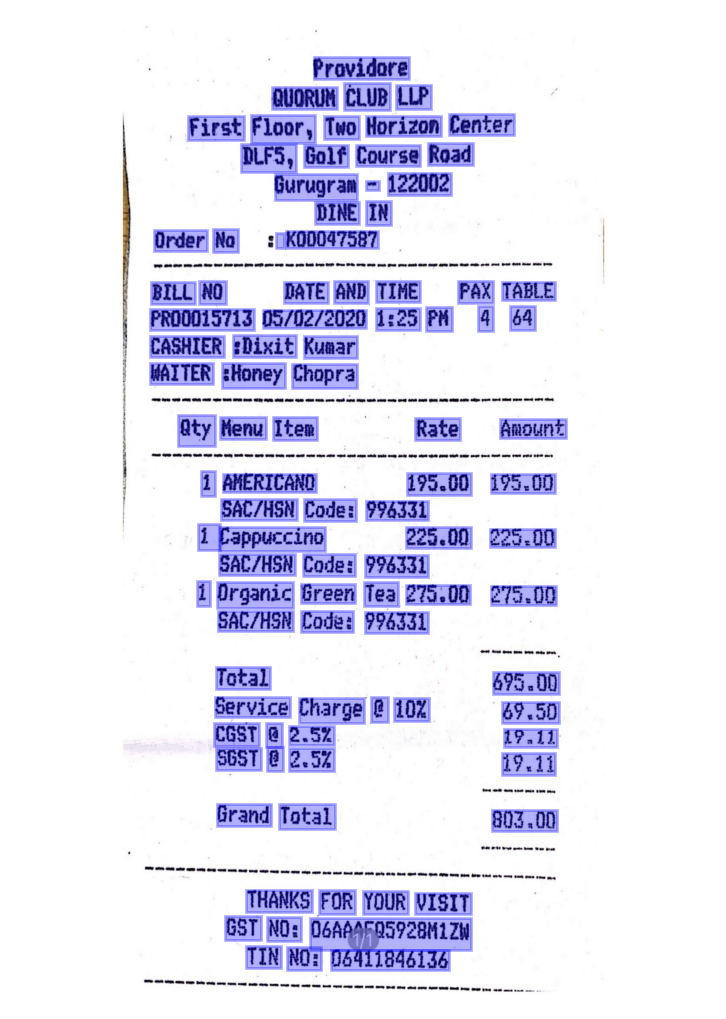

Text extracted is : Providore QUORUM CLUB LLP First Floor, Two Horizon Center DLF5, Golf Course Road Gurugram - 122002 DINE IN - K00047587 Order No BILL NO DATE AND TIME PAX TABLE 4 64 PR00015713 05/02/2020 1:25 PM CASHIER :Dixit Kumar WAITER Honey Chopra Qty Menu Item 1 AMERICANO 1 Cappuccino Rate Amount 195.00 195.00 225.00 225.00 SAC/HSN Code: 996331 SAC/HSN Code: 996331 SAC/HSN Code: 996331 1 Organic Green Tea 275.00 275.00 Total 695.00 69.50 19.11 19.11 803.00 Service Charge @ 10% CGST @ 2.5% SGST @ 2.5% Grand Total THANKS FOR YOUR VISIT GST NO: 06AAAFA5928M1ZW TIN NO: 06411846136

Grand total is the largest one:803.0
Invoice/Bill Number is : BILL





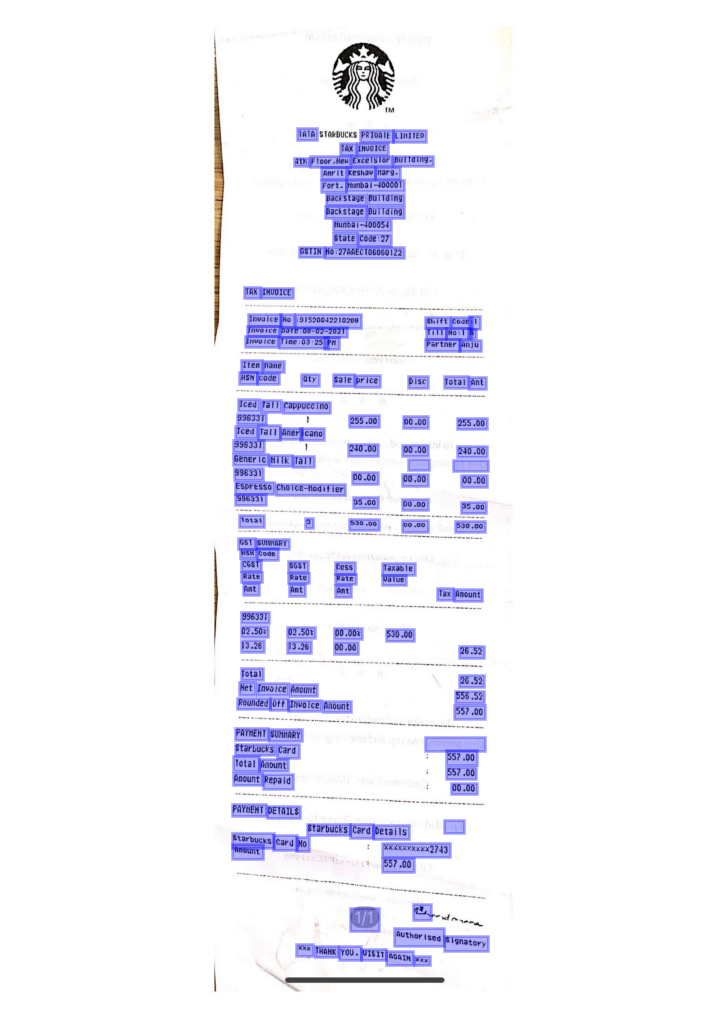

Text extracted is : TATA PRIVATE LIMITED TAX IHUOICE 4th Floor.New Excelsior Building. Anrit Keshav Marg. Fort. Hunbal-400001 Backstage Building Backstage Building Munbai-400054 State Code:27 GSTIN H0:27AAEC1060501Z2 TAX INVOICE Invoice No 91520042210208 Invoice Date:08-02-2021 Invoice Tine:03:25 PH Iten nane HSN code Oty sale price Iced Tall cappuccino 996331 Iced Tall Aner icano 996331 Generic HIIK Tall 996331 Espresso Choice-Hodifier 996331 Total GST SUMMARY HSH Code CGST Rate Ant 996331 02.50x 02.50: 00.00x 530.00 13.26 13.26 00.00 Total Het Invaice Anount Rounded Off Invoice Anount PAYMENT SUMMARY Starbucks Card Total Anount Anount Repald PAYMENT DETAILS Starbucks Card No Anount Shift Code: :1 Till Ho:1 A Partner. Anju Disc Total Ant 255.00 00.00 240.00 00.00 00.00 00.00 35.00 00.00 530.00 00.00 Cess Taxable Rate Value Ant 255.00 240.00 AnR 9g9ne 00.00 35.00 530.00 2 SGST Rate Ant Tax Anount 26.52 26.52 556.52 557.00 oageno 557.00 557.00 00.00 na Starbucks Card Details XXXXXXXXXX2

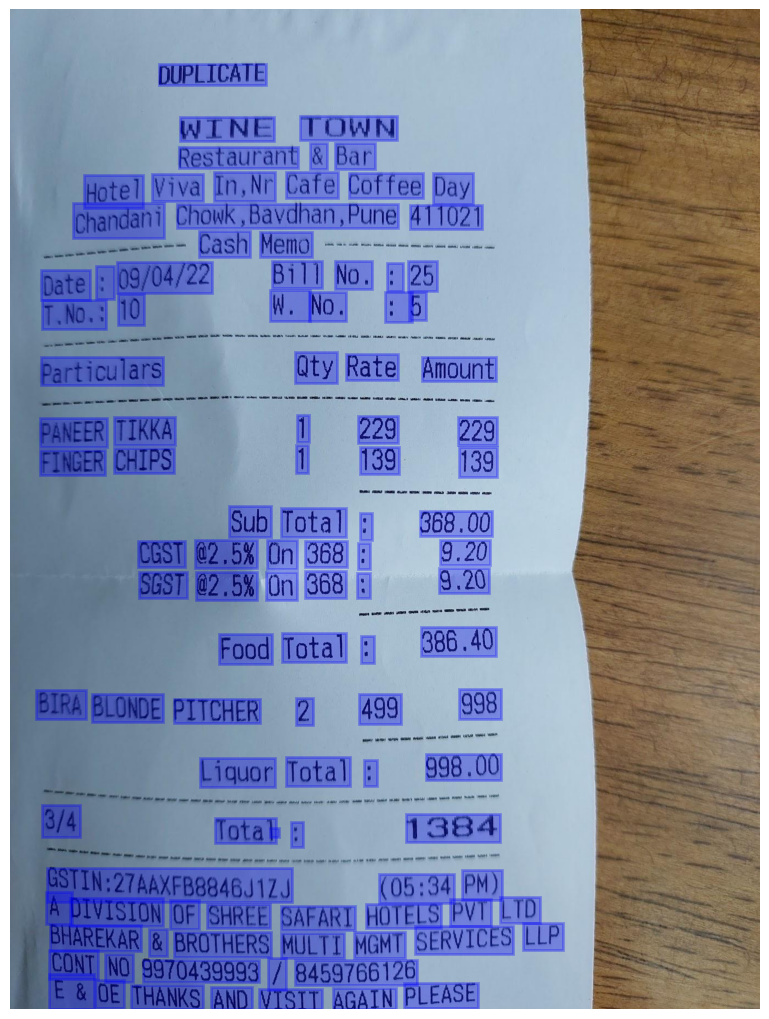

Text extracted is : DUPLICATE WINE TOWN Restaurant & Bar Hotel Viva In,Nr Cafe Coffee Day Chandani Chowk,Bavdhan,Pune 411021 Cash Memo Date : 09/04/22 T.No.: 10 Bill No. : 25 W. No. : 5 Particulars PANEER TIKKA FINGER CHIPS Qty Rate Amount 1 1 229 139 229 139 Sub Total : 368.00 9.20 9.20 386.40 CGST @2.5% On 368 : SGST @2.5% On 368 : Food Total : BIRA BLONDE PITCHER 2 499 998 Liquor Total : 998.00 1384 (05:34 PM) 3/4 Total - : STIN-Z7AAFB884611Z4 A DIVISION OF SHREE SAFARI HOTELS PVT LTD BHAREKAR & BROTHERS MULTI MGMT SERVICES LLP CONT NO 9970439993 / 8459766126 E& OE THANKS AND VISIT AGAIN PLEASE

Grand total is the largest one:998.0
Invoice/Bill Number is : 25





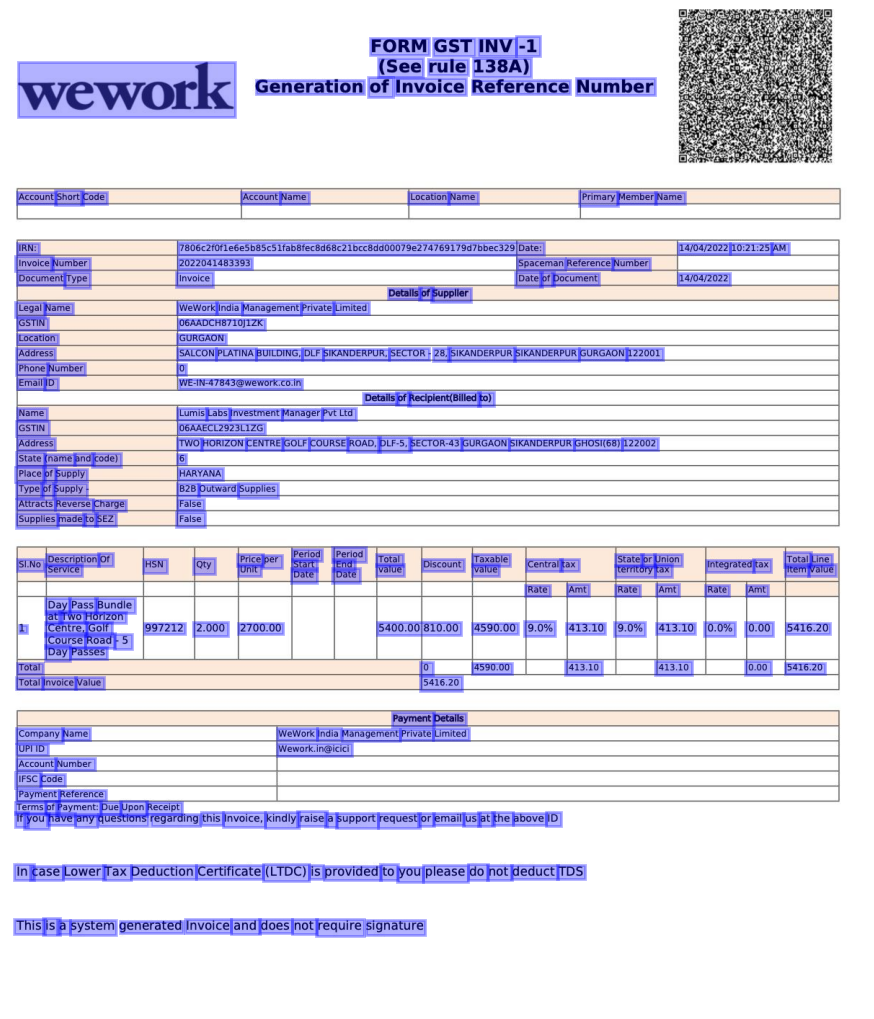

Text extracted is : FORM GST INV -1 (See rule 138A) wework Generation of Invoice Reference Number Account Short Code IRN: Invoice Number Document Type Legal Name GSTIN Location Address Phone Number Email ID Name GSTIN Address State (name and code) Place of Supply Type of Supply Attracts Reverse Charge Supplies made to SEZ SI.No Description Of Service Day Pass Bundle at Two Horizon 1 Centre, Golf Course Road -5 Day Passes Total Total Invoice Value Company Name UPIID Account Number IFSC Code Payment Reference Terms of Payment: Due Upon Receipt Account Name Location Name Primary Member Name 7806221011e6e5085e51lab8fecaesz2iloecec0o7e274791799d7bbec329Date: 14/04/2022 10:21:25 AM 14/04/2022 2022041483393 Invoice WeWork India Management Private Limited 06AADCH8710ZK GURGAON 0 Spaceman Reference Number Date of Document Detalls of Suppller SALCON PLATINA BUILDING, DLF SIKANDERPUR, SECTOR 28, SIKANDERPUR: SIKANDERPUR GURGAON 122001 WEN47BA)GMeNOR.ON Lumis Labs Investment Manager PvtLtd 06AAECL

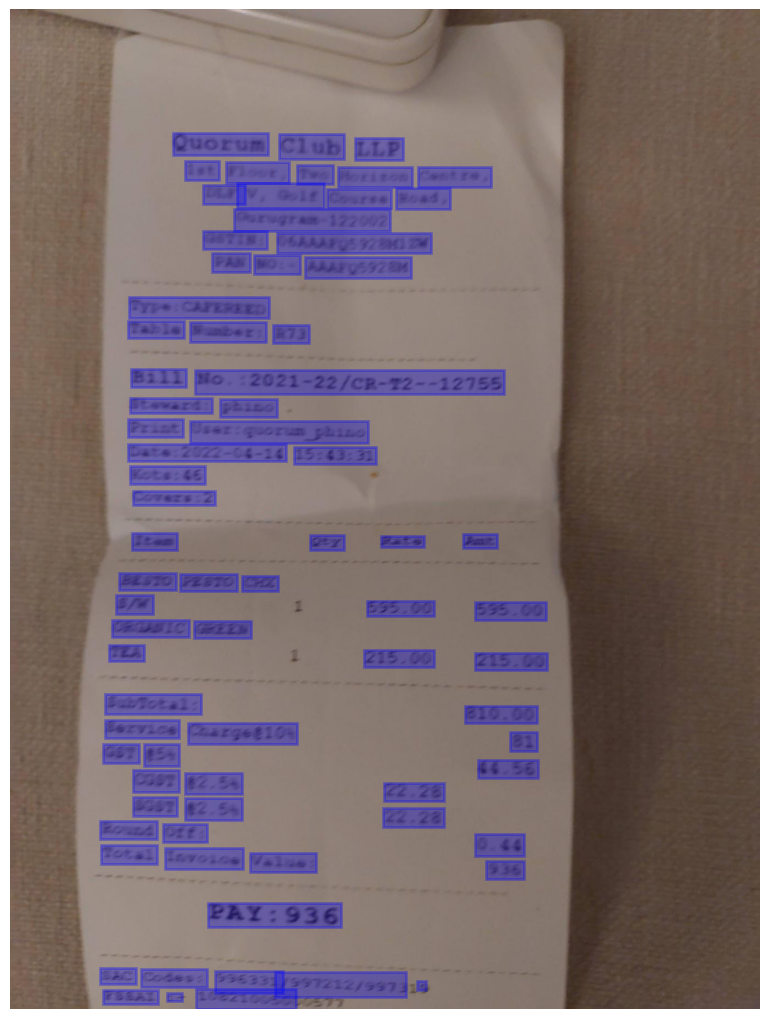

Text extracted is : Quorum Club LLP ist Flosr, Two Horisos Centre, Dur V,Gir Couree Road, rgram-122oz G87I3: CKAMAFOESZRKIN PAS 3O AMAFOS928M PyPCArREED Table Bmbers R73 B1ll Ho.:2021-22/CR-72--12755 Stevard phiso Print argrh Da:2022-04-14 15:43:31 Kots:46 Covers:2 Ites S/ 1ZA Qty Rate Aat B2370 22870 a ORGAIC GEZ 535.00 215.00 595.00 215.00 810.00 81 44.56 STotal: GST 854 Bervice Chargeti0s 0GS7 82,54 SG87 82.54 Round off: 22.28 22.28 0.44 936 Total Invosse Valses PAY:936 SAC Codess 996331 7997212/9973 a PSSAT : 108210050

Grand total is the largest one:810.0
Invoice/Bill Number is : 2021-22/CR-72--12755





In [ ]:
for path in filenames:
  output = ocr(path)
  text_export = export(output)
  res = all_text(text_export)

  amounts = find_amounts(res)
  # print(f"All Amounts with .00 ending's are : {amounts}")
  # Grand total is the largest one:
  print(f'Grand total is the largest one:{max(amounts)}')

  # Invoice no. will be after "Invoice No :" and add all the possibility of writing invoice number.
  invoice_no = find_invoice_no(res)
  print(f'Invoice/Bill Number is : {invoice_no}')
  print("\n\n")


